11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
235/235 [==============================] - 74s 310ms/step - loss: 0.2752 - val_loss: 0.1774
Epoch 2/10
235/235 [==============================] - 63s 267ms/step - loss: 0.1603 - val_loss: 0.1470
Epoch 3/10
235/235 [==============================] - 64s 271ms/step - loss: 0.1415 - val_loss: 0.1347
Epoch 4/10
235/235 [==============================] - 63s 267ms/step - loss: 0.1314 - val_loss: 0.1263
Epoch 5/10
235/235 [==============================] - 63s 269ms/step - loss: 0.1242 - val_loss: 0.1204
Epoch 6/10
235/235 [==============================] - 64s 275ms/step - loss: 0.1193 - val_loss: 0.1163
Epoch 7/10
235/235 [==============================] - 63s 269ms/step - loss: 0.1159 - val_loss: 0.1133
Epoch 8/10
235/235 [==============================] - 63s 267ms/step - loss: 0.1134 - val_loss: 0.1116
Epoch 9/10
235/235 [==============================] - 59s 251ms/step - loss: 0.1115 - val_loss: 0.1095
Epoch 10

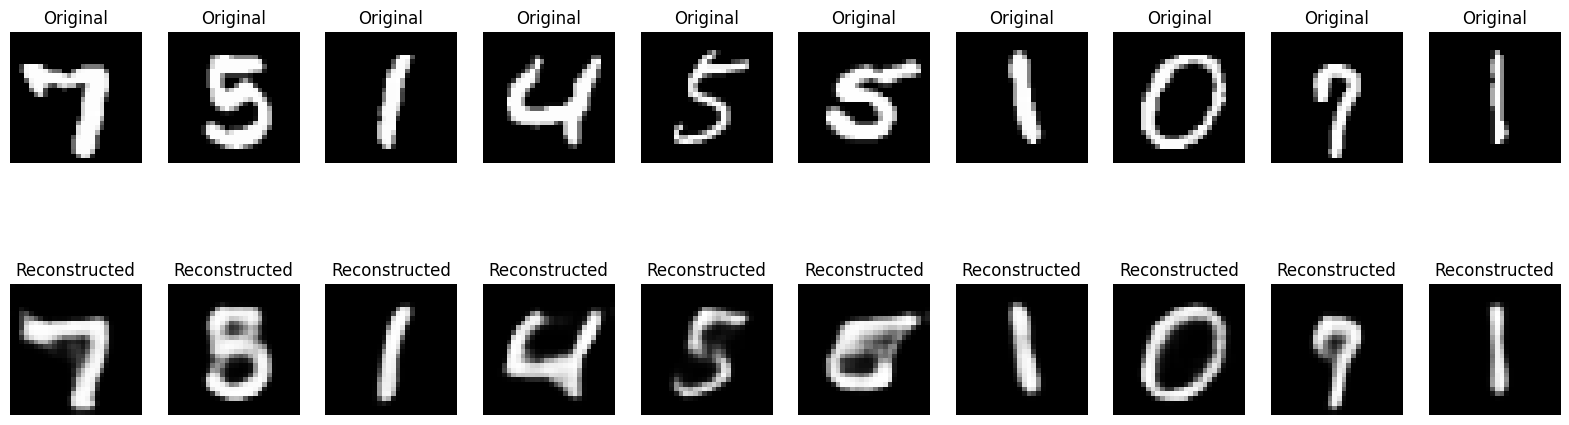

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Define the Convolutional Autoencoder
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model with fewer epochs
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Predict the regenerated images
decoded_imgs = autoencoder.predict(x_test)

# Display original and decoded images with different numbers
n = 10
indices = np.random.choice(len(x_test), n, replace=False)
plt.figure(figsize=(20, 6))
for i, index in enumerate(indices):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display decoded (reconstructed) image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[index].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()
